The data consists of 10,000 observations of space taken by the SDSS. Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.



# Data processing

In [1]:
#importing the required libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#importing warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading nthe dataset
df=pd.read_csv("space.csv")

In [3]:
#lets see insights of the data sets
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [4]:
df.tail()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229
9999,1.237650e+18,131.665012,51.805307,19.27586,17.37829,16.30542,15.83548,15.50588,1345,301,3,163,5.033410e+17,GALAXY,0.118417,447,51877,233


In [5]:
#cheking the columns
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

Feature Description


The table results from a query which joins two tables (actuaclly views): "PhotoObj" which contains photometric data and "SpecObj" which contains spectral data.

To ease your start with the data you can read the feature descriptions below:

View "PhotoObj"
objid = Object Identifier
ra = J2000 Right Ascension (r-band)
dec = J2000 Declination (r-band)
Right ascension (abbreviated RA) is the angular distance measured eastward along the celestial equator from the Sun at the March equinox to the hour circle of the point above the earth in question. When paired with declination (abbreviated dec), these astronomical coordinates specify the direction of a point on the celestial sphere (traditionally called in English the skies or the sky) in the equatorial coordinate system.

u = better of DeV/Exp magnitude fit

g = better of DeV/Exp magnitude fit

r = better of DeV/Exp magnitude fit

i = better of DeV/Exp magnitude fit

z = better of DeV/Exp magnitude fit

The Thuan-Gunn astronomic magnitude system. u, g, r, i, z represent the response of the 5 bands of the telescope.

run = Run Number

rereun = Rerun Number

camcol = Camera column

field = Field number

Run, rerun, camcol and field are features which describe a field within an image taken by the SDSS. A field is basically a part of the entire image corresponding to 2048 by 1489 pixels. A field can be identified by:

run number, which identifies the specific scan,
the camera column, or "camcol," a number from 1 to 6, identifying the scanline within the run, and
the field number. The field number typically starts at 11 (after an initial rampup time), and can be as large as 800 for particularly long runs.
An additional number, rerun, specifies how the image was processed.
View "SpecObj"
specobjid = Object Identifier
class = object class (galaxy, star or quasar object)
The class identifies an object to be either a galaxy, star or quasar. This will be the response variable which we will be trying to predict.

redshift = Final Redshift
plate = plate number
mjd = MJD of observation
fiberid = fiber ID
In physics, redshift happens when light or other electromagnetic radiation from an object is increased in wavelength, or shifted to the red end of the spectrum.

Each spectroscopic exposure employs a large, thin, circular metal plate that positions optical fibers via holes drilled at the locations of the images in the telescope focal plane. These fibers then feed into the spectrographs. Each plate has a unique serial number, which is called plate in views such as SpecObj in the CAS.

Modified Julian Date, used to indicate the date that a given piece of SDSS data (image or spectrum) was taken.

The SDSS spectrograph uses optical fibers to direct the light at the focal plane from individual objects to the slithead. Each object is assigned a corresponding fiberID.

# Exploring data

In [6]:
#cheking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [7]:
#cheking null values
print(df.isnull().sum())

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64


In [8]:
#cheking shape
df.shape

(10000, 18)

In [9]:
#checking the data types
df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [10]:
#Observation
#This data set has total 10000 rows and 18 columns
#no null values target variable has data type object rest all has float or int


# Summary statistics



In [11]:
df.describe(include="all")

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000,10000.000000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GALAXY,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4998,NaN,NaN,NaN,NaN
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,NaN,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,NaN,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,NaN,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,NaN,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,NaN,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,NaN,0.092579,2559.000000,54468.000000,510.000000


In [12]:
#From above table we can see class column has 3 unique catagoris
#Most of the coulmns have high difference between mean and median
#thier is a large difference between 75% and max values in columns like decso cfield, specobjid, redshift ,fiberid so chance of outliers in this coulmns is high


In [13]:
#checking the unique class
print("unique clases:",df["class"].unique())
print("Number each classes" ,df["class"].value_counts())

unique clases: ['STAR' 'GALAXY' 'QSO']
Number each classes GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64


In [14]:

#Transforming the catagorical data
order_label={"STAR":0,"GALAXY":1,"QSO":2}
df["class"]=df["class"].map(order_label)
print("Number each classes" ,df["class"].value_counts())

Number each classes 1    4998
0    4152
2     850
Name: class, dtype: int64


In [15]:
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,0,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,0,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,1,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,0,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,0,0.000590,3306,54922,512


<AxesSubplot:>

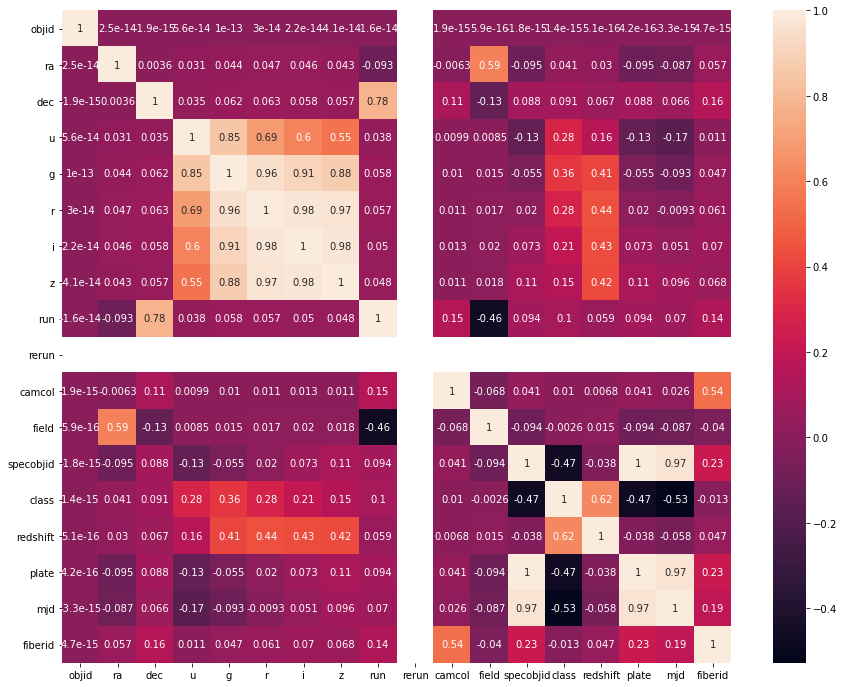

In [16]:
#checking the correlation
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True)

In [17]:
#As we can see most of the columns have corelation with target nut rerun has no corelation lets check the value counts
df["rerun"].value_counts()

301    10000
Name: rerun, dtype: int64

In [18]:
#rerun column has only one value so lets drop this column and field , camcol, fiberid has very low co relation lets drop that also
df.drop(["rerun","camcol","fiberid","field"],axis=1,inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   specobjid  10000 non-null  float64
 10  class      10000 non-null  int64  
 11  redshift   10000 non-null  float64
 12  plate      10000 non-null  int64  
 13  mjd        10000 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 1.1 MB


# Univariant analysis

count    10000.000000
mean         0.143726
std          0.388774
min         -0.004136
25%          0.000081
50%          0.042591
75%          0.092579
max          5.353854
Name: redshift, dtype: float64
maximum value of redshift is 5.353854
minmum value of redshift is -0.004136078
average value of redshift is -0.004136078
Number of positive value of redshift is 8062
Number of negetive value of redshift is 1938
About 75% of the values lies with in 1 unit


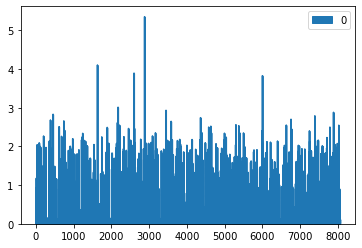

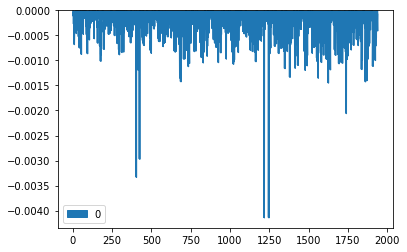

In [20]:
#lets start with univariant analysis of the varables which has high corelation
#Analysis of redshift
print(df["redshift"].describe())
#reshift has both positive and negetive values lest separate both for a while for analysis
positive_values=[]
negetive_values=[]
for i in df["redshift"]:
    if i>0:
        positive_values.append(i) 
    else:
        negetive_values.append(i)


pd.DataFrame(positive_values).plot.area()

pd.DataFrame(negetive_values).plot.area()
print("maximum value of redshift is",df["redshift"].max())
print("minmum value of redshift is",df["redshift"].min())
print("average value of redshift is",df["redshift"].min())
print("Number of positive value of redshift is",pd.DataFrame(positive_values).value_counts().sum())
print("Number of negetive value of redshift is",pd.DataFrame(negetive_values).value_counts().sum())
print("About 75% of the values lies with in 1 unit")

count    1.000000e+04
mean     1.645022e+18
std      2.013998e+18
min      2.995780e+17
25%      3.389248e+17
50%      4.966580e+17
75%      2.881300e+18
max      9.468830e+18
Name: specobjid, dtype: float64


maximum value of specobjid is 9.46883e+18


minmum value of specobjidis 2.99578e+17


Average value of specobjid is 2.99578e+17


About 50% of the object lies below 4.96658e+17


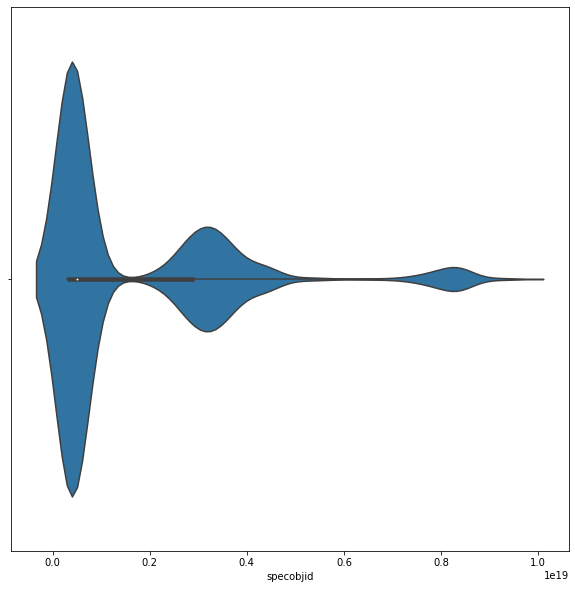

In [21]:
#Analysis of specobjid(object identifier)
print(df["specobjid"].describe())
plt.figure(figsize=(10,10))
sns.violinplot(x="specobjid", data=df)
print("\n")
print("maximum value of specobjid is",df["specobjid"].max())
print("\n")
print("minmum value of specobjidis",df["specobjid"].min())
print("\n")
print("Average value of specobjid is",df["specobjid"].min())
print("\n")
print("About 50% of the object lies below",df["specobjid"].quantile(.50))

count    10000.000000
mean     52943.533300
std       1511.150651
min      51578.000000
25%      51900.000000
50%      51997.000000
75%      54468.000000
max      57481.000000
Name: mjd, dtype: float64


maximum value of mjd observation is 57481


minmum value of mjd observation 51578


Average value of mjd observation is 51578


About 50% of the mjd observation lies below 51997.0


mjd value of  0    52000
dtype: int64  has been recorded for most number of times


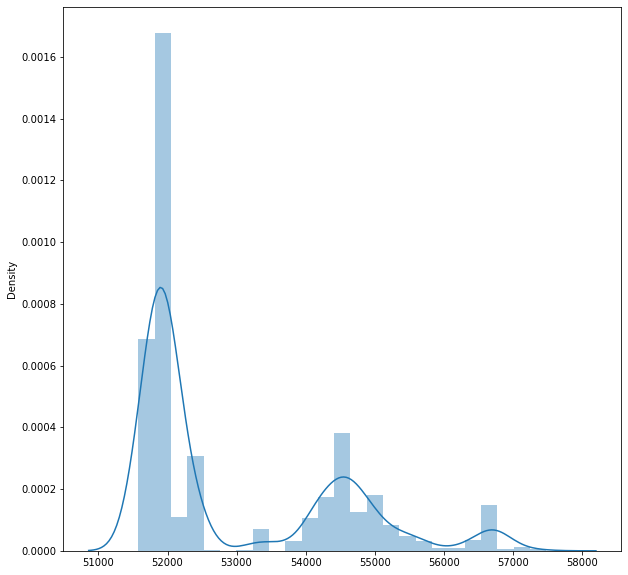

In [22]:
#Analysis of MJD of observation
print(df["mjd"].describe())
plt.figure(figsize=(10,10))
sns.distplot(x=df["mjd"] )
print("\n")
print("maximum value of mjd observation is",df["mjd"].max())
print("\n")
print("minmum value of mjd observation",df["mjd"].min())
print("\n")
print("Average value of mjd observation is",df["mjd"].min())
print("\n")
print("About 50% of the mjd observation lies below",df["mjd"].quantile(.50))
print("\n")
print("mjd value of ",df["mjd"].mode()," has been recorded for most number of times")

count    10000.000000
mean      1460.986400
std       1788.778371
min        266.000000
25%        301.000000
50%        441.000000
75%       2559.000000
max       8410.000000
Name: plate, dtype: float64


maximum value of plate number is 8410


minmum value of plate number 266


Average value of plate number is 266


About 50% of the plate number lies below 441.0


plate number of  0    2558
dtype: int64  has been recorded for most number of times


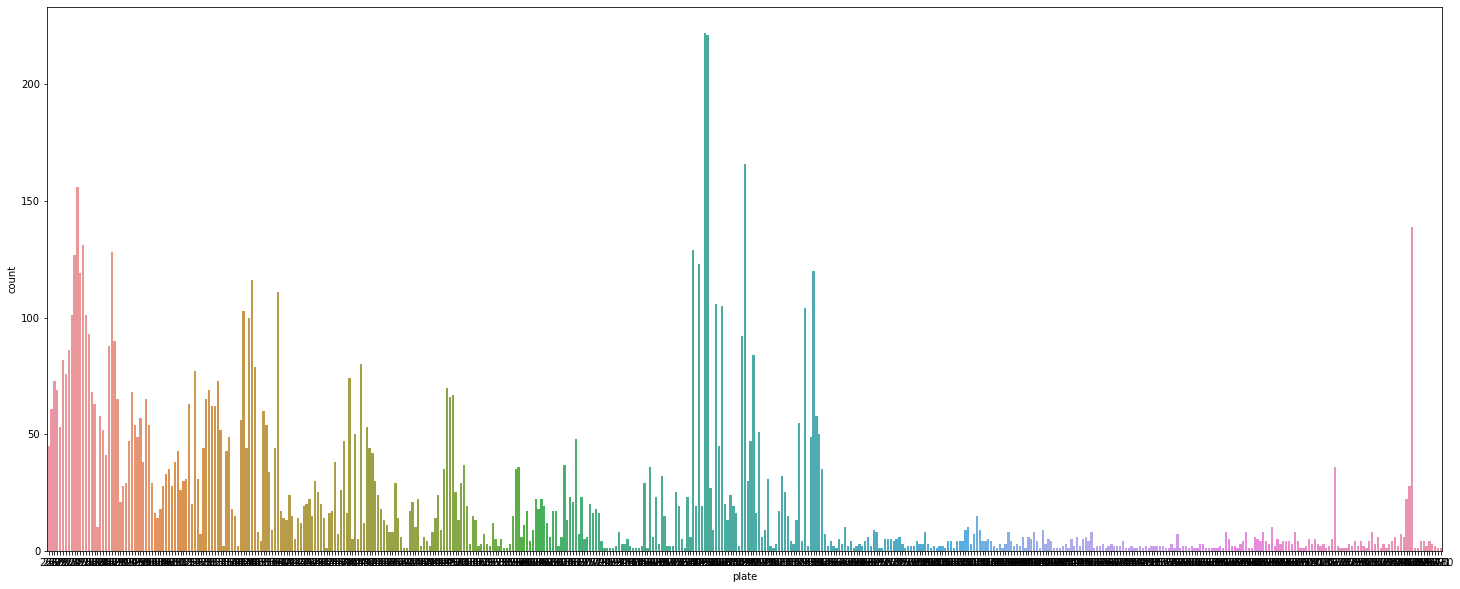

In [23]:
#Analysis of plate number
print(df["plate"].describe())
plt.figure(figsize=(25,10))
sns.countplot(x=df["plate"])
print("\n")
print("maximum value of plate number is",df["plate"].max())
print("\n")
print("minmum value of plate number",df["plate"].min())
print("\n")
print("Average value of plate number is",df["plate"].min())
print("\n")
print("About 50% of the plate number lies below",df["plate"].quantile(.50))
print("\n")
print("plate number of ",df["plate"].mode()," has been recorded for most number of times")

# Bivariant analysis

Average values of u g r z and i for rescpective classes
               u          g          r          z          i
class                                                       
0      18.330439  17.130547  16.732093  16.531119  16.594047
1      18.804339  17.350216  16.649506  16.017923  16.272770
2      18.942928  18.678714  18.498535  18.274761  18.360007


Text(0.5, 1.0, 'Mean distribution of i for all 3 clases')

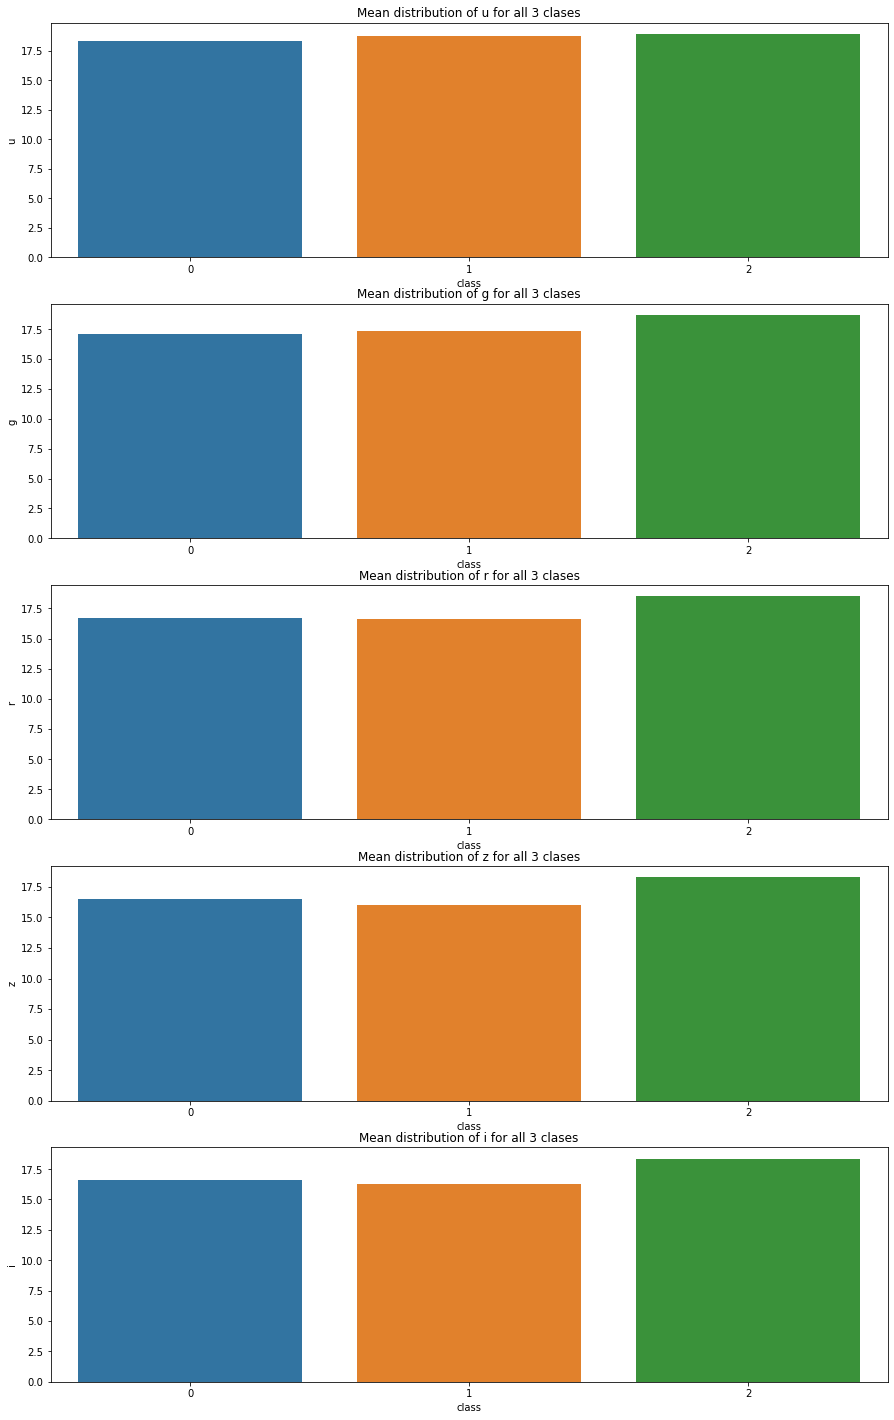

In [24]:
#Analysis of u,g,r,i,z with respect to class
df2=df.groupby("class").agg({"u":"mean","g":"mean","r":"mean","z":"mean","i":"mean"})
print("Average values of u g r z and i for rescpective classes")
print(df2)
fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1,figsize=(15,25))
sns.barplot(x=df2.index,y=df2["u"],ax=ax1)
ax1.set_title("Mean distribution of u for all 3 clases")
sns.barplot(x=df2.index,y=df2["g"],ax=ax2)
ax2.set_title("Mean distribution of g for all 3 clases")
sns.barplot(x=df2.index,y=df2["r"],ax=ax3)
ax3.set_title("Mean distribution of r for all 3 clases")
sns.barplot(x=df2.index,y=df2["z"],ax=ax4)
ax4.set_title("Mean distribution of z for all 3 clases")
sns.barplot(x=df2.index,y=df2["i"],ax=ax5)
ax5.set_title("Mean distribution of i for all 3 clases")

In [25]:
#From the graph we can see that average values of u g r z and i are high at class 2 and low at class 0
#so we can say if the values are high then chaces of class 2 is more and if values are low chances of class 0 is more

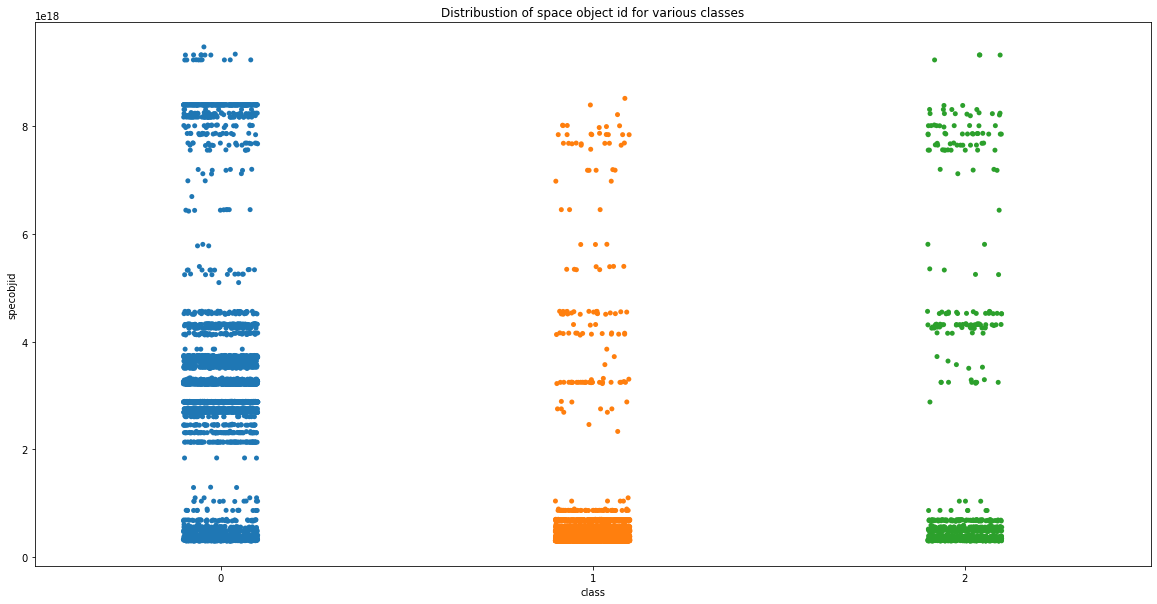

Average space object id for various classes


          specobjid
class              
0      3.018202e+18
1      5.379141e+17
2      1.447231e+18


MAximum space object id for various classes
          specobjid
class              
0      9.468830e+18
1      8.514180e+18
2      9.319320e+18


Minimum space object id for various classes
          specobjid
class              
0      2.995850e+17
1      2.995780e+17
2      2.995980e+17


In [26]:
#analysis of class of various space object id
plt.figure(figsize=(20,10))
sns.stripplot(x=df["class"],y=df["specobjid"])
plt.title("Distribustion of space object id for various classes")
plt.show()
df3=df.groupby("class").agg({"specobjid":"mean"})
print("Average space object id for various classes")
print("\n")
print(df3)
print("\n")
df4=df.groupby("class").agg({"specobjid":"max"})
print("MAximum space object id for various classes")
print(df4)
print("\n")
df5=df.groupby("class").agg({"specobjid":"min"})
print("Minimum space object id for various classes")
print(df5)

In [27]:
#Observation
#average space object id is high for class 1 and its maximum is 8.51 and low for class 2 its maximum is 9.31
#minimum values is almost same for all 3 classes
#so we can say most of the class 1 have high object id were as class 2 low object id


This table shows frequncy of run value and class
        class
run          
1.0         1
4.0         2
10.0        1
31.0        2
49.0        2
112.0       1
137.0       0
182.0       0
197.0       1
212.0       0
245.0       2
246.0       1
347.0       1
396.0       0
453.0       1
527.0       1
540.0       0
915.0       1
2086.0      1
3060.0      1


This table shows frequncy of different run value 756     3060
752     2086
1345     915
1350     540
1140     527
745      453
1035     396
1412     347
1302     246
1331     245
1231     245
1334     212
1239     197
1336     182
1404     137
1045     112
1402      49
308       31
1411      10
1356       4
727        4
1119       1
1332       1
Name: run, dtype: int64


Average run values for various class
               run
class             
0       950.886561
1       996.711685
2      1036.120000


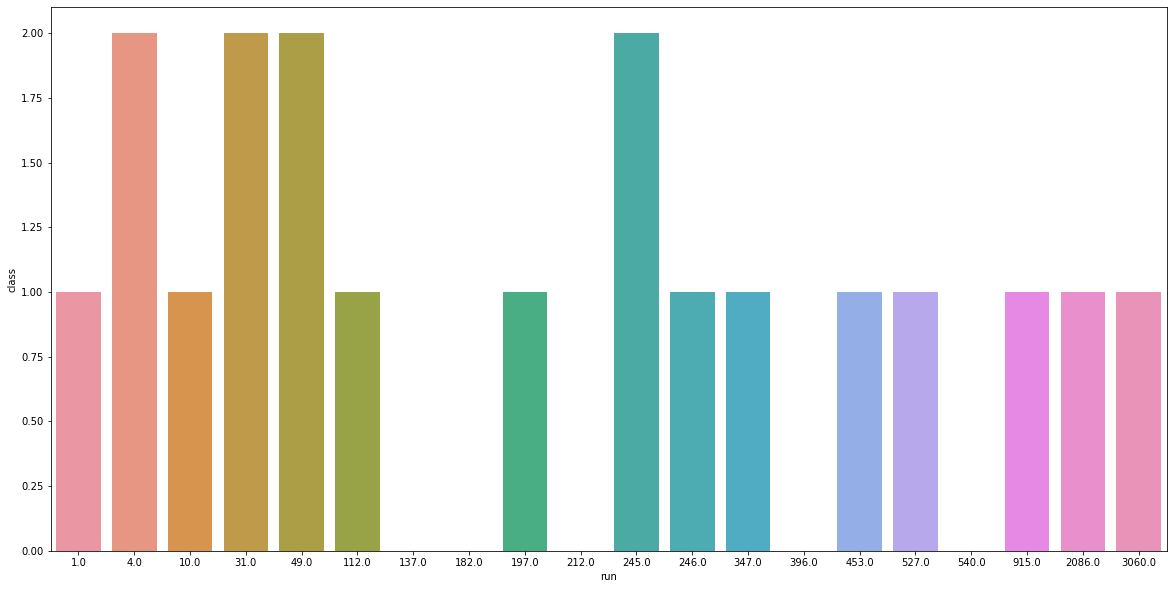

In [28]:
#analysis of run vs class
df6=df.groupby(df["run"].value_counts()).agg({"class":"sum"})
print("This table shows frequncy of run value and class" )
print(df6)
print("\n")
print("This table shows frequncy of different run value", df["run"].value_counts()) 
plt.figure(figsize=(20,10))
sns.barplot(x=df6.index,y=df6["class"])
print("\n")
print("Average run values for various class" )
df7=df.groupby(df["class"]).agg({"run":"mean"})
print(df7)

In [29]:
#observation
#most of the run values are recorded are class 1 and its average value is 996
#class 2 has recorded least number of run values and its average vale is 1036.120000

# Multivariant analysis

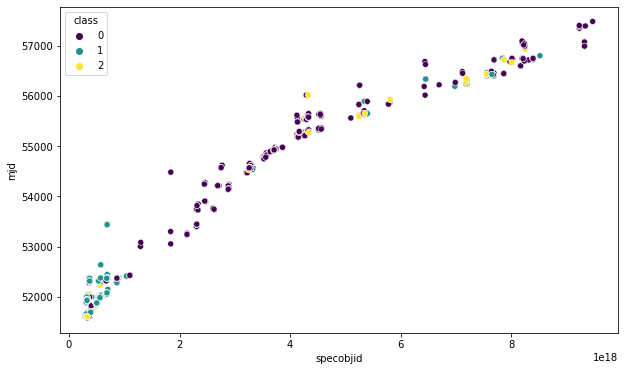

Average space object id and mjd for each class
                mjd     specobjid
class                            
0      54093.892823  3.018202e+18
1      52030.280912  5.379141e+17
2      52694.289412  1.447231e+18


In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='specobjid',y='mjd',data=df,hue='class',palette='viridis')
plt.show()
#mjd and specid are showing linear behaviour
df7=df.groupby(df["class"]).agg({"mjd":"mean","specobjid":"mean"})
print("Average space object id and mjd for each class")
print(df7)

objid            AxesSubplot(0.125,0.71587;0.168478x0.16413)
ra            AxesSubplot(0.327174,0.71587;0.168478x0.16413)
dec           AxesSubplot(0.529348,0.71587;0.168478x0.16413)
u             AxesSubplot(0.731522,0.71587;0.168478x0.16413)
g               AxesSubplot(0.125,0.518913;0.168478x0.16413)
r            AxesSubplot(0.327174,0.518913;0.168478x0.16413)
i            AxesSubplot(0.529348,0.518913;0.168478x0.16413)
z            AxesSubplot(0.731522,0.518913;0.168478x0.16413)
run             AxesSubplot(0.125,0.321957;0.168478x0.16413)
specobjid    AxesSubplot(0.327174,0.321957;0.168478x0.16413)
class        AxesSubplot(0.529348,0.321957;0.168478x0.16413)
redshift     AxesSubplot(0.731522,0.321957;0.168478x0.16413)
plate              AxesSubplot(0.125,0.125;0.168478x0.16413)
mjd             AxesSubplot(0.327174,0.125;0.168478x0.16413)
dtype: object

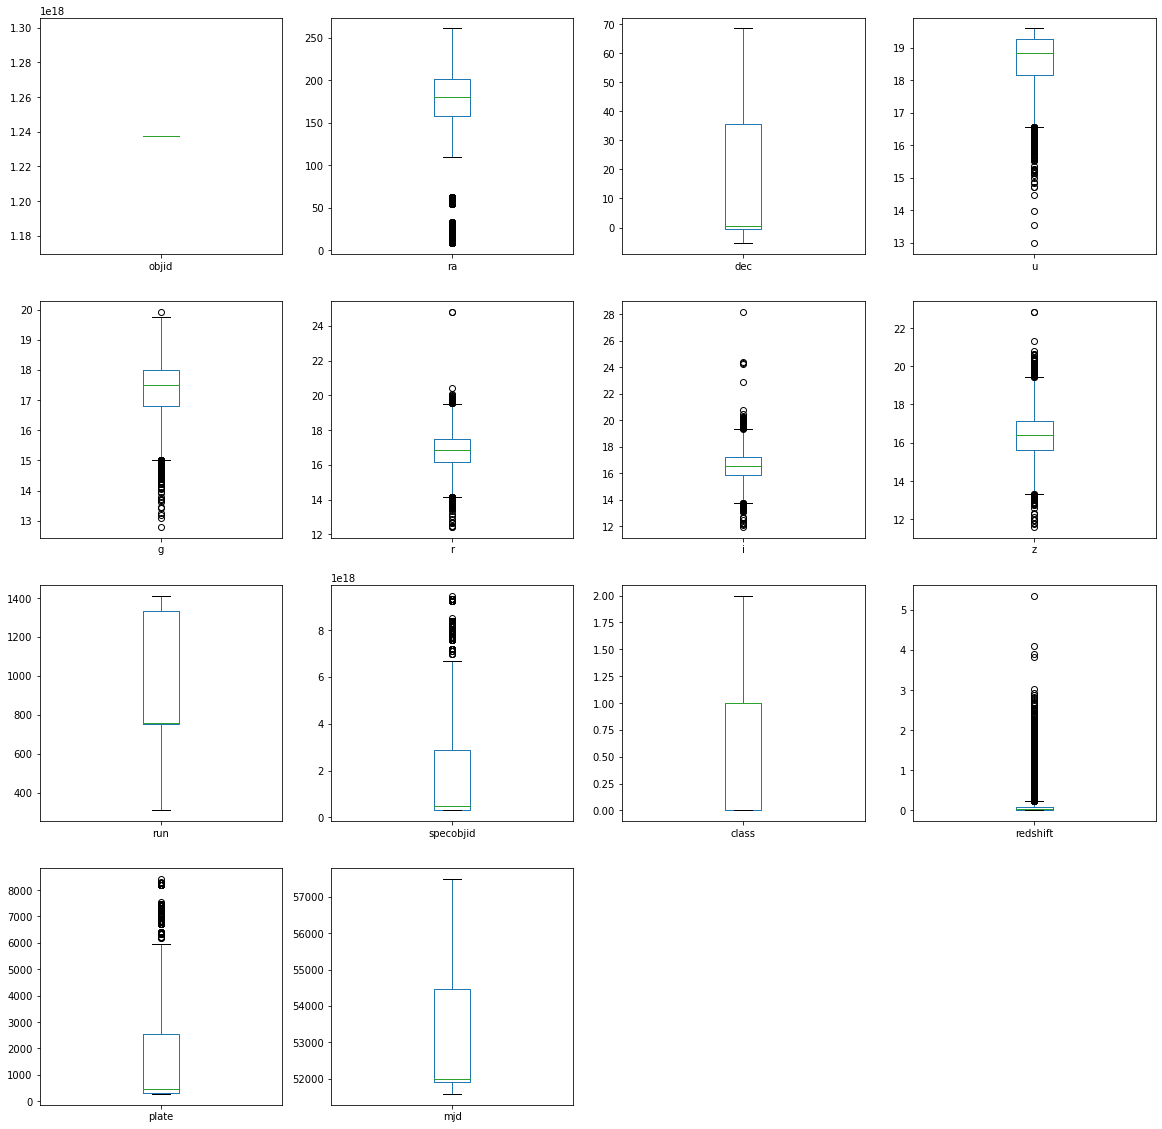

In [31]:
#Cheking the outliers
df.plot(kind="box", subplots=True, layout=(4,4),figsize=(20,20))

In [32]:
#most of the columns have outliers which is need to be removed

In [33]:
#Cheking skewness
df.skew()

objid        0.000000
ra          -1.227350
dec          1.191544
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
specobjid    1.794627
class        0.381391
redshift     4.265729
plate        1.794609
mjd          1.039610
dtype: float64

In [34]:
#high skewness is present is some of the columns we need to remove the skewness also

<Figure size 2160x2160 with 0 Axes>

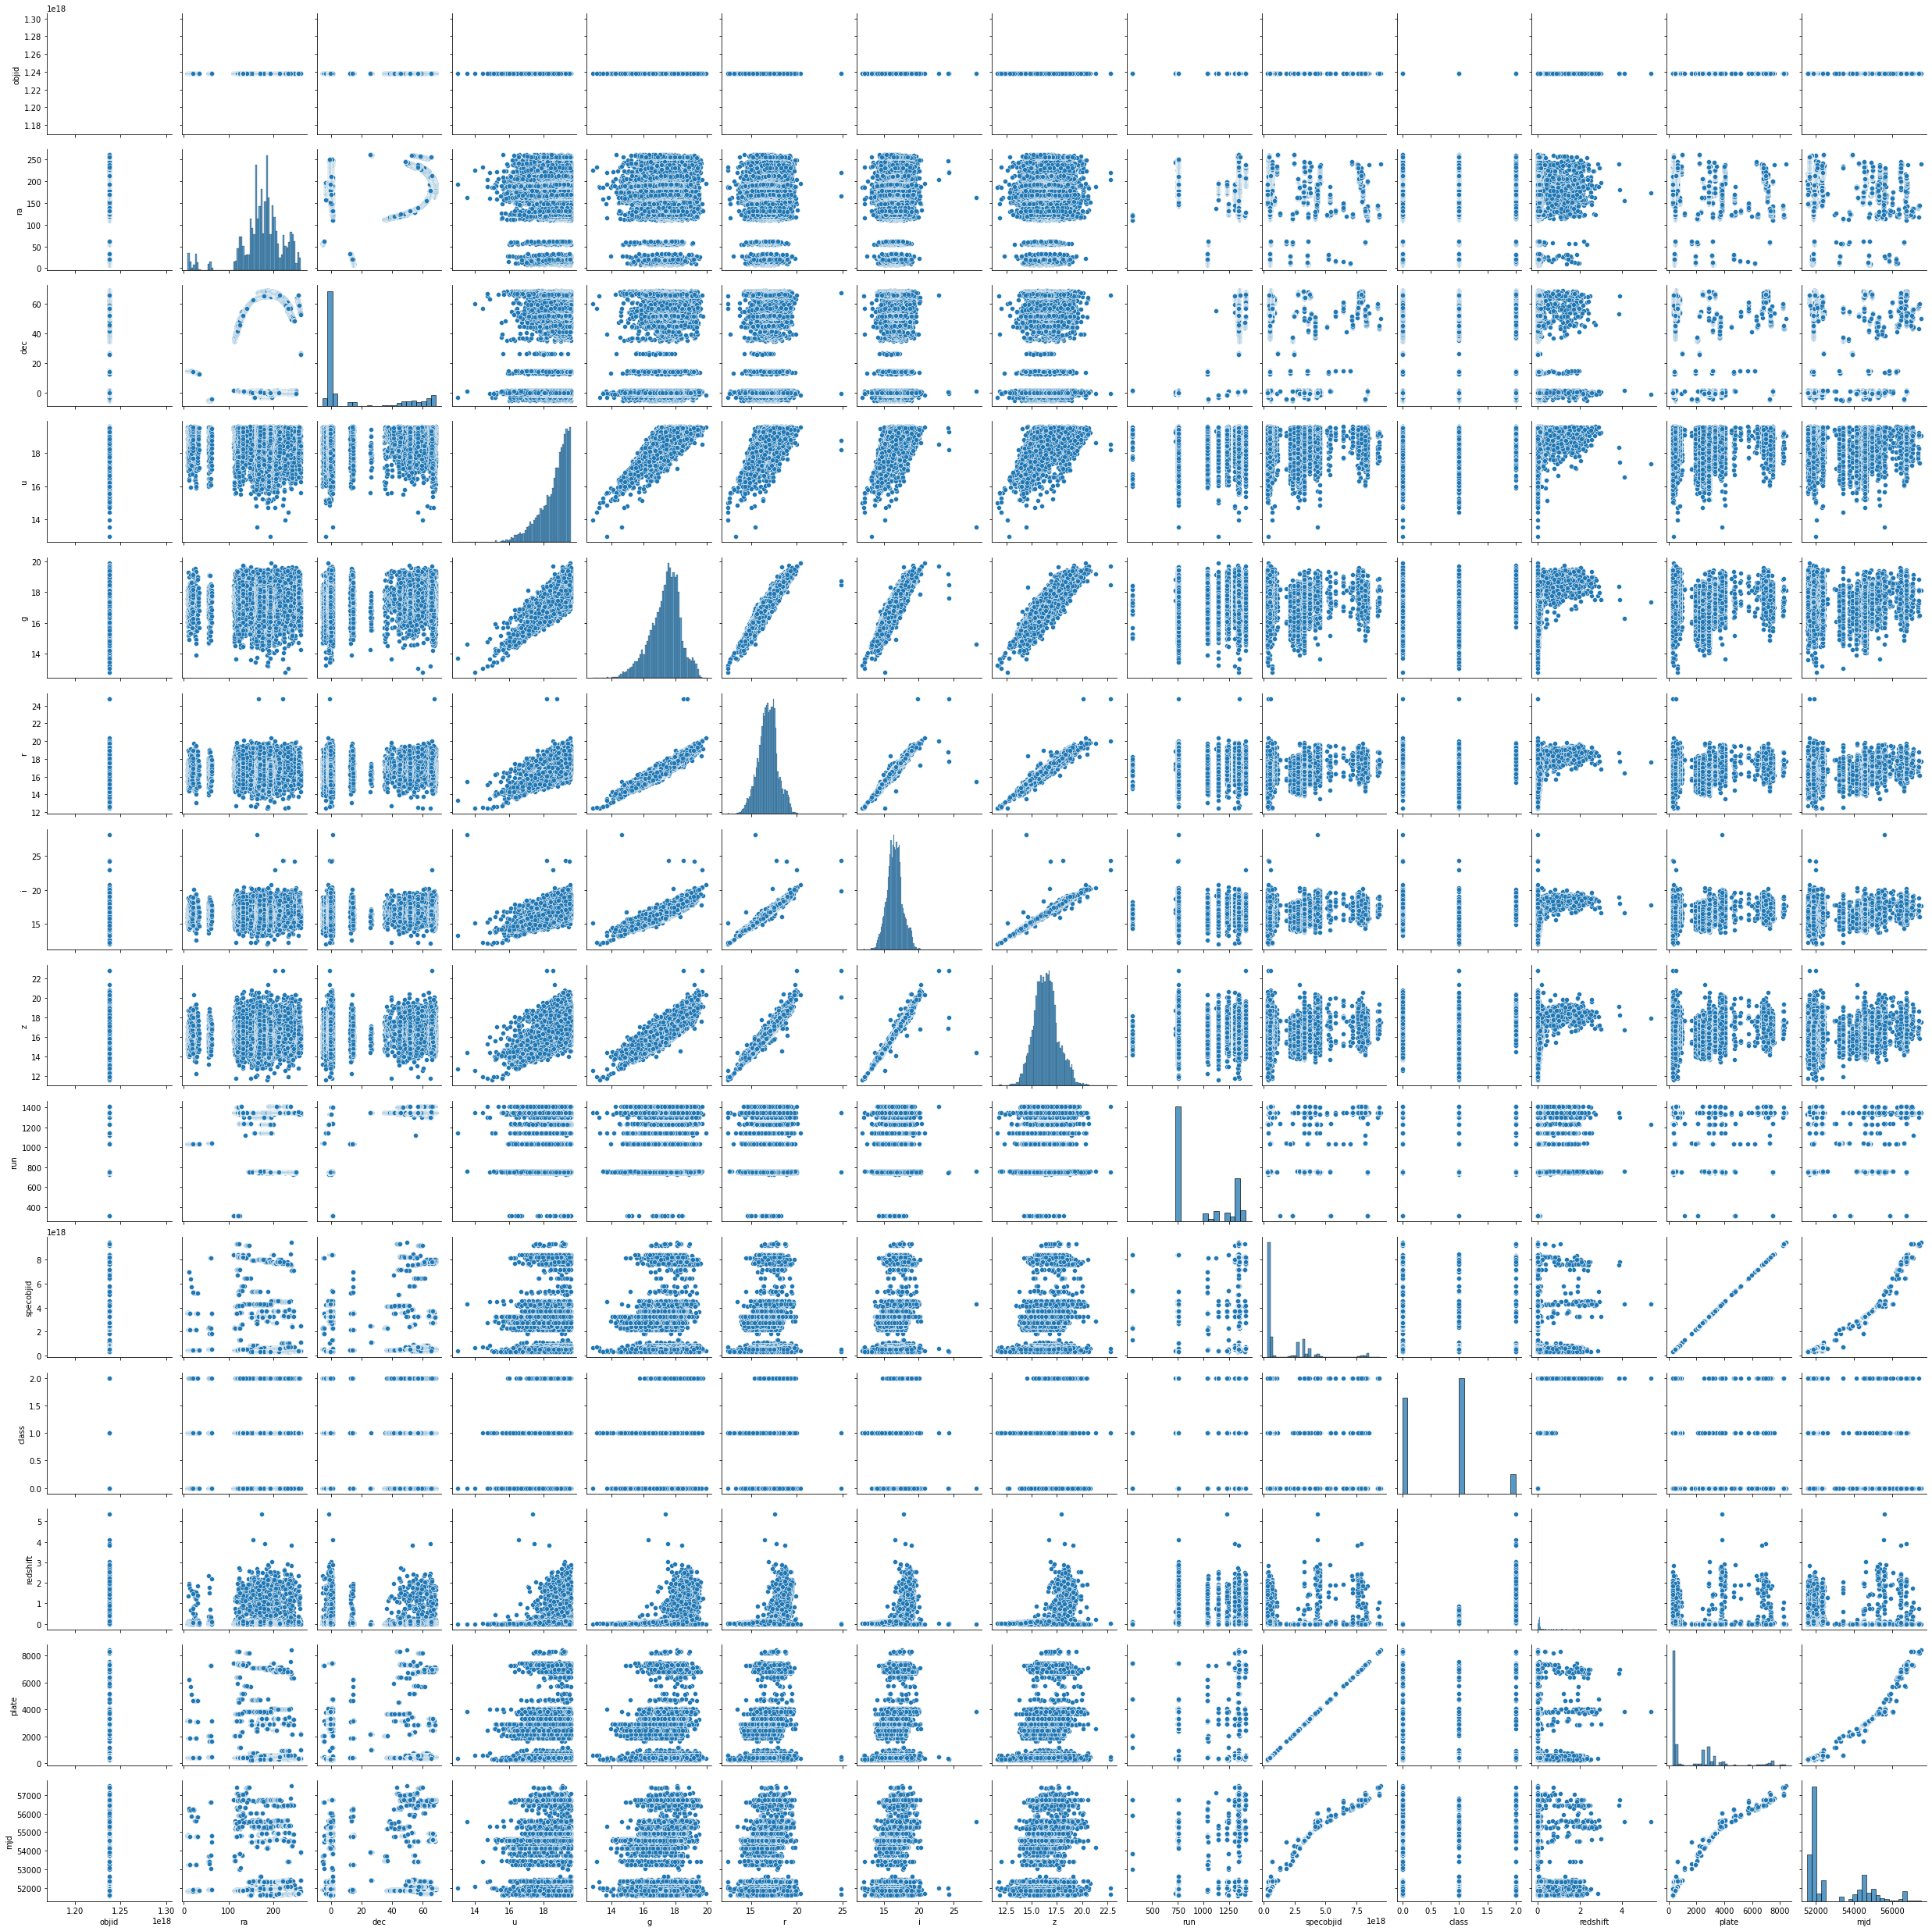

In [35]:
#checking the pairplot and analysisng corelation and skewness among all the columns
plt.figure(figsize=(30,30))
sns.pairplot(df)

# Data cleaning and transformation

In [36]:
df['objid'].value_counts()
# there is only one value in objid column and hence we will drop that

1.237650e+18    10000
Name: objid, dtype: int64

In [37]:
df=df.drop('objid',axis=1)

In [38]:
df.shape

(10000, 13)

In [39]:
#removing the outliers
print(df.shape)
from scipy.stats import zscore
z=np.abs(zscore(df))
z

(10000, 13)


array([[0.16745842, 0.58492272, 1.03148637, ..., 0.36973112, 1.03148936,
        1.30931064],
       [0.16886159, 0.58311429, 0.05243046, ..., 0.36984929, 0.63621258,
        0.87919741],
       [0.17057433, 0.58347525, 0.92156796, ..., 0.05302706, 0.65633905,
        0.60919097],
       ...,
       [0.92039468, 1.46090664, 0.16753826, ..., 0.37074104, 3.26608697,
        2.69309363],
       [0.92197294, 1.46432109, 0.31801835, ..., 0.33364691, 0.56688806,
        0.70581092],
       [0.91804124, 1.46639319, 0.79229193, ..., 0.06510125, 0.56688806,
        0.70581092]])

In [40]:
df_new=df[(z<3).all(axis=1)]
print(df_new.shape)
percentage_ofouliers=((10000-8713)/10000)*100

print("using z score percentage of outlier removed:",percentage_ofouliers)

(8713, 13)
using z score percentage of outlier removed: 12.870000000000001


In [41]:
#since the percentage of outliers removed is more lets drop a column with low corelation and try again
df=df.drop('ra',axis=1)

In [42]:
#removing the outliers
print(df.shape)
from scipy.stats import zscore
z=np.abs(zscore(df))
z

(10000, 12)


array([[0.58492272, 1.03148637, 0.34855938, ..., 0.36973112, 1.03148936,
        1.30931064],
       [0.58311429, 0.05243046, 0.16653251, ..., 0.36984929, 0.63621258,
        0.87919741],
       [0.58347525, 0.92156796, 0.86709322, ..., 0.05302706, 0.65633905,
        0.60919097],
       ...,
       [1.46090664, 0.16753826, 0.42934659, ..., 0.37074104, 3.26608697,
        2.69309363],
       [1.46432109, 0.31801835, 0.56985707, ..., 0.33364691, 0.56688806,
        0.70581092],
       [1.46639319, 0.79229193, 0.00672567, ..., 0.06510125, 0.56688806,
        0.70581092]])

In [43]:
df_new=df[(z<3).all(axis=1)]
print(df_new.shape)
percentage_ofouliers=((10000-9084)/10000)*100

print("using z score percentage of outlier removed:",percentage_ofouliers)

(9084, 12)
using z score percentage of outlier removed: 9.16


In [44]:
#assigning the target and attribute variables
x=df_new.drop(labels="class",axis=1)
y=df_new["class"]

In [45]:
#checking the skewness
x.skew()

dec          1.242262
u           -0.971868
g           -0.516324
r           -0.144772
i            0.062958
z            0.173410
run          0.497149
specobjid    1.304005
redshift     4.961951
plate        1.303989
mjd          0.954915
dtype: float64

In [46]:
#Removing the skewness
from sklearn.preprocessing import power_transform
x=power_transform(x,method=("yeo-johnson"))
x=pd.DataFrame(x)
print(x.skew())

0    -0.494630
1    -0.208901
2    -0.018238
3    -0.001894
4     0.000983
5     0.000224
6     0.010746
7     0.000000
8     0.456772
9     0.441778
10    0.000000
dtype: float64


In [47]:
#standardizing the values
from sklearn.preprocessing import StandardScaler
sl=StandardScaler()
print(sl.fit(x))


StandardScaler()


# Model Fitting

In [48]:
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
#Optimizer
from sklearn.model_selection import GridSearchCV,cross_val_score

import warnings
warnings.filterwarnings("ignore")



In [49]:
#Define a function to try different train test folds
def model_select(model):
    max_score=0
    max_state=0
    for i in range(42,105):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=i)
        md=model()
        md.fit(x_train,y_train)
        predict=md.predict(x_test)
        accuracyscore=accuracy_score(y_test,predict)
        if accuracyscore>max_score:
            max_score=accuracyscore
            max_state=i
    print("Max score is {} with random state {}".format(max_score,max_state))

In [50]:
models=[SVC,LogisticRegression,GaussianNB,RandomForestClassifier,KNeighborsClassifier,DecisionTreeClassifier,AdaBoostClassifier]
for i in models:
    print(i,model_select(i))

Max score is 0.9923282188125417 with random state 75
<class 'sklearn.svm._classes.SVC'> None
Max score is 0.994996664442962 with random state 78
<class 'sklearn.linear_model._logistic.LogisticRegression'> None
Max score is 0.9873248832555037 with random state 67
<class 'sklearn.naive_bayes.GaussianNB'> None
Max score is 0.9939959973315544 with random state 75
<class 'sklearn.ensemble._forest.RandomForestClassifier'> None
Max score is 0.9849899933288859 with random state 75
<class 'sklearn.neighbors._classification.KNeighborsClassifier'> None
Max score is 0.9909939959973315 with random state 75
<class 'sklearn.tree._classes.DecisionTreeClassifier'> None
Max score is 0.9839893262174784 with random state 84
<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> None


In [51]:
#from above model performance we can see that logistic regressioin gives best accuracy with random state 86 so lets proceed with that model

In [68]:
#lets  check with logisticn regression
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=78)
print(x_train.shape, x_test.shape)

(6086, 11) (2998, 11)


In [69]:
cross_val_score(LogisticRegression(),x_train,y_train,cv=5).mean()

0.9850476217461172

In [70]:
#CV score and accuracy score is nearly same..will go for optimization for better accuracy

In [72]:
#CV score of random forest is best lets do parameter tuning
#optimization
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [73]:
#parameter tuning
lg = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_cv = GridSearchCV(estimator=lg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

grid_cv = grid_cv.fit(x_train,y_train)

print("Our optimized Random Forest model is:")
grid_cv.best_estimator_

Our optimized Random Forest model is:


LogisticRegression(C=100, solver='newton-cg')

In [81]:
lg = grid_cv.best_estimator_

lg.fit(x_train, y_train)
pred_lg = lg.predict(x_test)
print("confusion matrix",confusion_matrix(y_test,pred_lg ))
print("\n")
print("classificationreport", classification_report(y_test,pred_lg))
print("accuracy score",accuracy_score(y_test,pred_lg))

confusion matrix [[1258    0    0]
 [   5 1580    1]
 [   0    7  147]]


classificationreport               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1258
           1       1.00      1.00      1.00      1586
           2       0.99      0.95      0.97       154

    accuracy                           1.00      2998
   macro avg       0.99      0.98      0.99      2998
weighted avg       1.00      1.00      1.00      2998

accuracy score 0.9956637758505671


<AxesSubplot:>

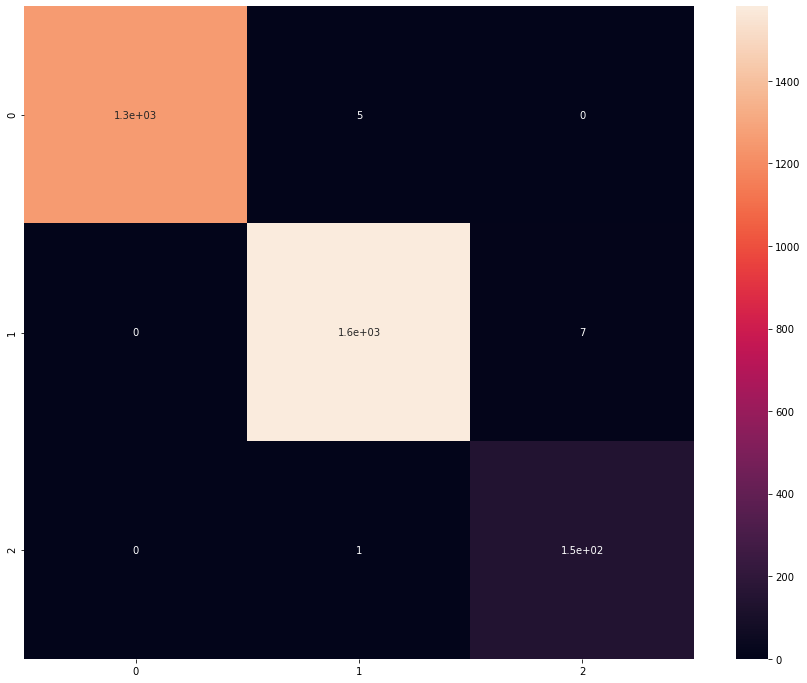

In [82]:
#confusion matrix in heat map
plt.figure(figsize=(15,12))
sns.heatmap(confusion_matrix(pred_rf, y_test), annot=True)

Text(0, 0.5, 'Predicted Y')

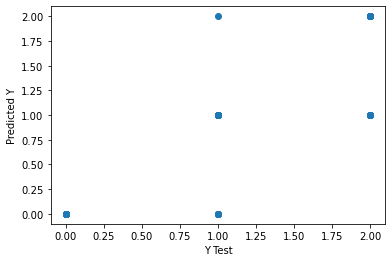

In [83]:
# Plotting the actual y and predicted y
plt.scatter(x=y_test,y=pred_rf)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [84]:
#Graph shows the values predicted by model campared to actual values of y
#now we can  predict class of object star galaxy or quasar based on the attribute values
#saving the model

In [78]:
import pickle
filename="spaceobject_clasification.pkl"
pickle.dump(lg,open(filename,"wb"))